**Objective**
To understand the usage pattern of shopping mall with the help of k-means clustering .
The spatial usage pattern depends on number of factors
Location (latitude, longitude) & Usage Pattern (sales volume, footfall, visit frequency, etc.) influenced by relatime factors.
KMeans would naturally group similar stores together based on behavioral or business attributes.In this notebook we tried to use fictius mall data by following below steps:

Collect Store Data
    ↓
Engineer Features (type, revenue, footfall, peak times)
    ↓
Standardize / Normalize Features
    ↓
Apply K-Means Clustering
    ↓
Assign Zones to Each Cluster
    ↓
Mall Layout Planning based on clusters



In [1]:
# Install necessary packages
!pip install -q seaborn

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
# Step 1: Create Fake Mall Store Data
np.random.seed(42)
n_stores = 80

In [5]:
# Store Types (simulated)
store_types = np.random.choice(
    ['Clothing', 'Food', 'Electronics', 'Kids', 'Entertainment', 'Beauty'],
    size=n_stores
)

In [6]:
# Simulated features
revenue = np.random.randint(50000, 500000, size=n_stores)  # Monthly revenue
footfall = np.random.randint(500, 10000, size=n_stores)    # Monthly footfall
avg_purchase_value = np.random.randint(200, 3000, size=n_stores)  # Avg purchase

# Store DataFrame
mall_data = pd.DataFrame({
    'Store_ID': range(1, n_stores + 1),
    'Store_Type': store_types,
    'Monthly_Revenue': revenue,
    'Monthly_Footfall': footfall,
    'Avg_Purchase_Value': avg_purchase_value
})

mall_data.head()

,Store_ID,Store_Type,Monthly_Revenue,Monthly_Footfall,Avg_Purchase_Value
0,1,Kids,87065,7908,1569
1,2,Entertainment,273165,9255,2186
2,3,Electronics,149299,5616,1734
3,4,Entertainment,475822,6519,346
4,5,Entertainment,61534,2257,1934


In [7]:
# Step 2: Feature Encoding
# Convert 'Store_Type' to numerical encoding
mall_data_encoded = pd.get_dummies(mall_data, columns=['Store_Type'])

# Features to cluster on
features = [
    'Monthly_Revenue',
    'Monthly_Footfall',
    'Avg_Purchase_Value'
] + [col for col in mall_data_encoded.columns if col.startswith('Store_Type_')]

In [8]:
# Step 3: Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(mall_data_encoded[features])


In [9]:
# Step 4: Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
mall_data['Zone'] = kmeans.fit_predict(X_scaled)

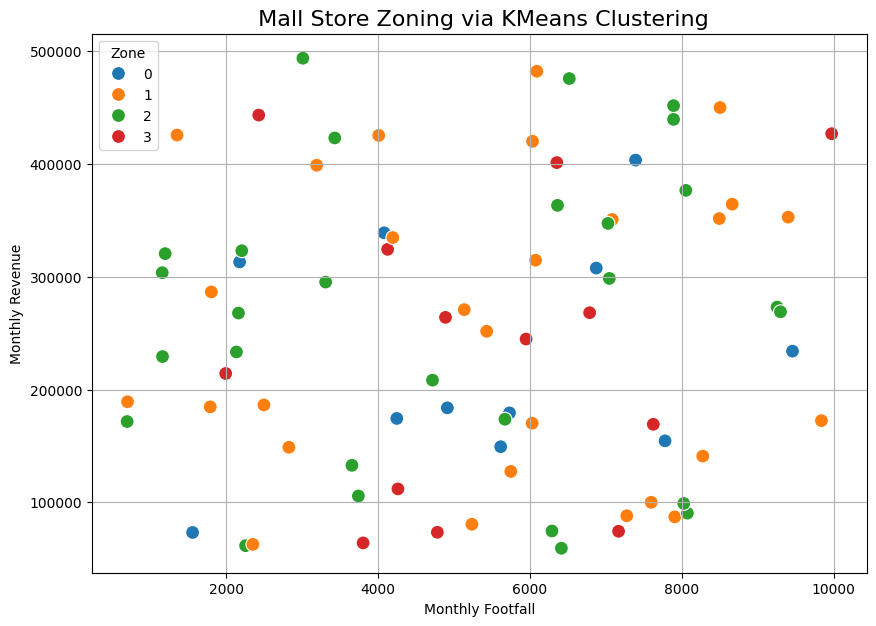

In [12]:
# Step 5: Visualize Clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='Monthly_Footfall', y='Monthly_Revenue',
    hue='Zone',
    palette='tab10',
    data=mall_data,
    s=100
)
plt.title(' Mall Store Zoning via KMeans Clustering', fontsize=16)
plt.xlabel('Monthly Footfall')
plt.ylabel('Monthly Revenue')
plt.legend(title='Zone')
plt.grid(True)
plt.show()

In [13]:
# Step 6: Zone-wise Summary
zone_summary = mall_data.groupby('Zone').agg({
    'Store_ID': 'count',
    'Monthly_Revenue': 'mean',
    'Monthly_Footfall': 'mean',
    'Avg_Purchase_Value': 'mean'
}).rename(columns={'Store_ID': 'Number_of_Stores'})

print("Zone Summary:")
print(zone_summary)

Zone Summary:
      Number_of_Stores  Monthly_Revenue  Monthly_Footfall  Avg_Purchase_Value
Zone                                                                         
0                   11    228362.818182       5439.181818         1489.090909
1                   28    257832.928571       5484.321429         1653.000000
2                   28    262930.000000       4952.785714         1667.250000
3                   13    236909.076923       5396.076923         1591.307692
